In [41]:

from typing import List
import random

from matplotlib import pyplot as plt

from ch04_linear_algebra import vector_mean
from ch19_clustering import KMeans
from ch19_clustering import squared_distance
from ch19_clustering import squared_clustering_errors
from ch19_clustering import bottom_up_cluster
from ch19_clustering import generate_clusters
from ch19_clustering import get_values

Vector = List[float]

inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

[-14, 13, 20, -19, -9, 21, -49, 26, -46, -34, 11, -49, -22, 19, -12, -13, -41, -11, -25, -18]
[-5, 13, 23, -11, -16, 27, 15, 13, 5, -1, 15, 0, -16, 28, -8, -19, 8, -6, -9, -3]


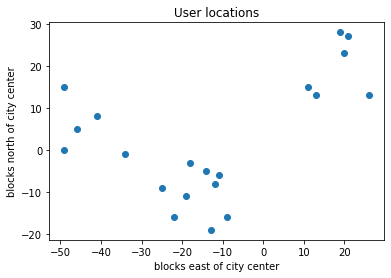

In [42]:

xs = [i[0] for i in inputs]
ys = [i[1] for i in inputs]

print(xs)
print(ys)

# generate scatter plot
plt.scatter(xs, ys)

# labels, title and show
plt.title("User locations")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()
plt.close()

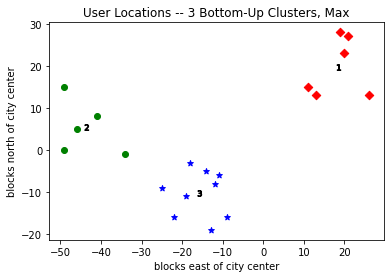

<Figure size 432x288 with 0 Axes>

In [43]:
base_cluster_max = bottom_up_cluster(inputs, max)
three_clusters_max = [get_values(cluster)
                      for cluster in generate_clusters(base_cluster_max, 3)]

for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters_max,
                                     ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

plt.savefig('im/bottom_up_clusters_max.png')
#plt.gca().clear()
#plt.close()

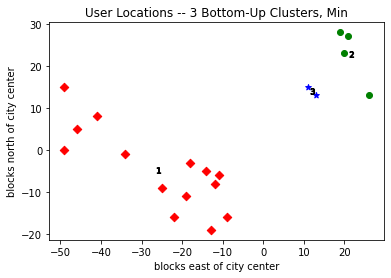

<Figure size 432x288 with 0 Axes>

In [44]:
base_cluster = bottom_up_cluster(inputs)
    
three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 3)]


# sort smallest to largest
tc = sorted(three_clusters, key=len)
assert len(tc) == 3
assert [len(c) for c in tc] == [2, 4, 14]
assert sorted(tc[0]) == [[11, 15], [13, 13]]
    
for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters,
                                     ['D','o','*'],
                                     ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()
    
plt.savefig('im/bottom_up_clusters_min.png')
#plt.gca().clear()
#plt.close()

# Choosing k

changed: 5 / 20: : 1it [00:00, 421.11it/s]
changed: 4 / 20: : 2it [00:00, 154.37it/s]
0it [00:00, ?it/s]
changed: 8 / 20: : 1it [00:00, 385.65it/s]
changed: 2 / 20: : 2it [00:00, 213.24it/s]
changed: 2 / 20: : 2it [00:00, 339.70it/s]
changed: 2 / 20: : 4it [00:00, 454.24it/s]
changed: 1 / 20: : 3it [00:00, 453.98it/s]
changed: 1 / 20: : 5it [00:00, 328.81it/s]
changed: 4 / 20: : 2it [00:00, 324.90it/s]
changed: 2 / 20: : 3it [00:00, 455.39it/s]
changed: 4 / 20: : 3it [00:00, 416.32it/s]
changed: 1 / 20: : 3it [00:00, 331.11it/s]
changed: 1 / 20: : 3it [00:00, 237.34it/s]
changed: 1 / 20: : 3it [00:00, 247.20it/s]
changed: 1 / 20: : 3it [00:00, 252.60it/s]
changed: 1 / 20: : 4it [00:00, 199.25it/s]
changed: 3 / 20: : 3it [00:00, 219.38it/s]
changed: 1 / 20: : 4it [00:00, 283.64it/s]
changed: 3 / 20: : 3it [00:00, 102.56it/s]
changed: 3 / 20: : 3it [00:00, 275.75it/s]
changed: 1 / 20: : 5it [00:00, 284.31it/s]


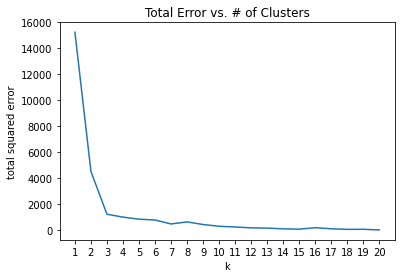

<Figure size 432x288 with 0 Axes>

In [45]:

random.seed(12)                   # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)   # sort for the unit test

assert len(means) == 3

# Check that the means are close to what we expect.
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1
    
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1



# now plot from 1 up to len(inputs) clusters

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]
    
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()
plt.savefig('im/total_error_vs_num_clusters')
# plt.gca().clear()


# Images

changed: 4 / 194040: : 18it [00:44,  2.45s/it]


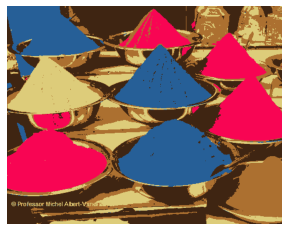

<Figure size 432x288 with 0 Axes>

In [46]:
image_path = r"im/colours_of_india.jpg"    # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(image_path) / 256  # rescale to between 0 and 1
    
# .tolist() converts a numpy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]
    
clusterer = KMeans(5)
clusterer.train(pixels)   # this might take a while
    
def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)        # index of the closest cluster
    return clusterer.means[cluster]            # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row]   # recolor this row of pixels
           for row in img]                     # for each row in the image


plt.close()

plt.imshow(new_img)
plt.axis('off')
plt.show()
plt.savefig('im/recolored_girl_with_book.jpg')
# plt.gca().clear()